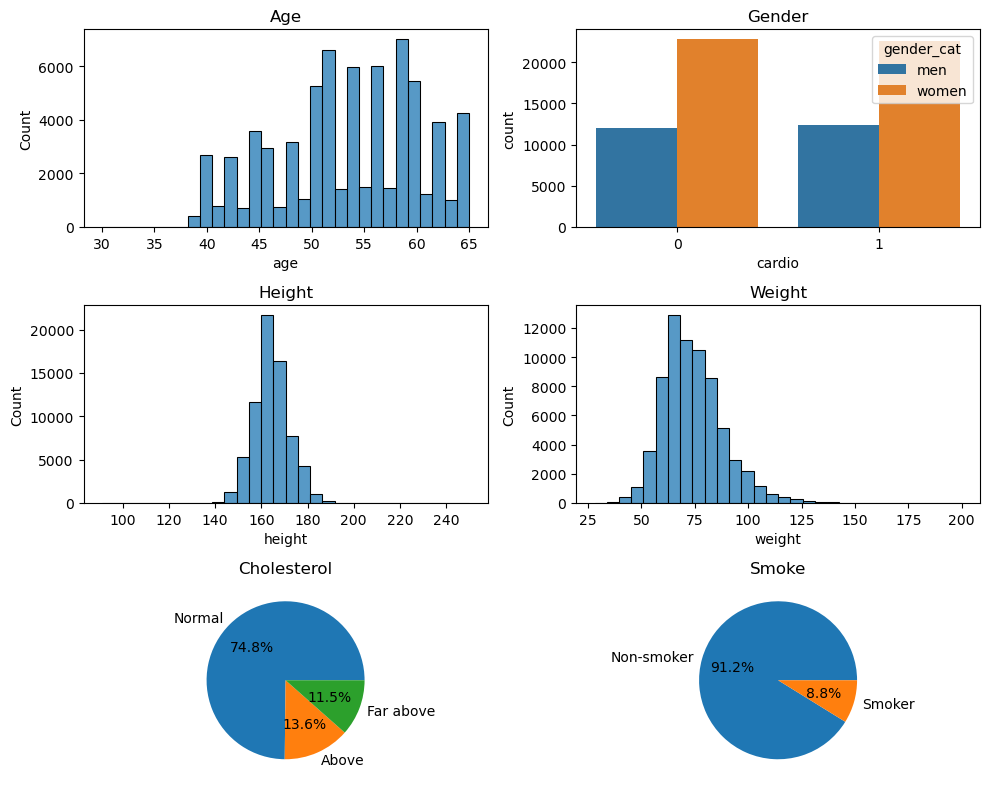

In [24]:
from SjukdomPrediktion import visualize_categories, visualize_individual, visualize_results, show_correlation
from SjukdomPrediktion import load_data, clean_data, compare_models, evaluate_xgboost_classifier, visualize_results

df = load_data()
df = clean_data(df)
visualize_individual(df)

# Hantering av vissa kolumner
### BMI kolumnen
Jag valde att ta bort BMI värde som är mindre än 10 och större än 70. De gränserna valde jag för att det är
väldigt livshotande att personer har ett BMI-värde över 70 samt att det är också vildigt svårt att leva med ett värde under 10. Det innebär att man har väldig lite krops vikt och befinner sig i ett alvarlig 
hälsotillsånd.
### systoliskt och diastoliskt kolumner
Vissa värde var rätt men det bara hade minus värde vilket var det fel. Visa värde skulle vara 120 men det var skriven 12, då behövde den en extra nolla. Andra värde justierades för att de hade en eller flera extra nollor dvs om det skulle vara 120 så var det 1200 eller 120000. Data där diastoliska värde var lika eller större än
systoliksa raderades för att värdet skulle vara omöjligt. 
Raderade också data som hade ett värde över 185 vilket skulle vara omöjligt  

![Categories](categories_plot.png)

# Korrelation mellan variabler 
Mappen visar korrelation medllan variabler med hjälp av fäger. Ju mörkröd det är destu högre positiv korrelation finns mellan variabler. Ju mörkblå det är destu högre negativ korrelation finns mellan variabler. Ett exempel är högt systoliskt och diastoliskt blodtryck som är positiv korrelerade för att när systolisk blodtryck går upp, händer det samma sak för diastolikt blodtryck. Det går också se att Vikt och BMI är korrelerade för att vikt är en faktora som räknas in Bmi-beräkningen. Längd är också en faktor som är en del av BMI beräkning och det är negativ korrelerade med BMI-värden. 

![Korrelation](korreklatin_plot.png)

In [21]:
verson_1 = compare_models(df, version=1, verbose= False)
verson_2 = compare_models(df, version= 2, verbose= False)


Modelljämförelse:

             model  accuracy  precision   recall  f1_score
           XGBoost  0.731846   0.733234 0.731846  0.731448
      RandomForest  0.729637   0.732757 0.729637  0.728730
  VotingClassifier  0.729352   0.731542 0.729352  0.728712
      DecisionTree  0.727571   0.729464 0.727571  0.727009
LogisticRegression  0.725362   0.731064 0.725362  0.723659
               KNN  0.702344   0.702511 0.702344  0.702284

Modelljämförelse:

             model  accuracy  precision   recall  f1_score
           XGBoost  0.733343   0.735086 0.733343  0.732849
      RandomForest  0.732488   0.734616 0.732488  0.731881
  VotingClassifier  0.731419   0.733248 0.731419  0.730893
LogisticRegression  0.726716   0.729532 0.726716  0.725876
      DecisionTree  0.726573   0.726970 0.726573  0.726454
               KNN  0.704981   0.705148 0.704981  0.704921


Klassificeringsrapport för XGBoost:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76      3518
           1       0.76      0.70      0.73      3394

    accuracy                           0.74      6912
   macro avg       0.74      0.74      0.74      6912
weighted avg       0.74      0.74      0.74      6912



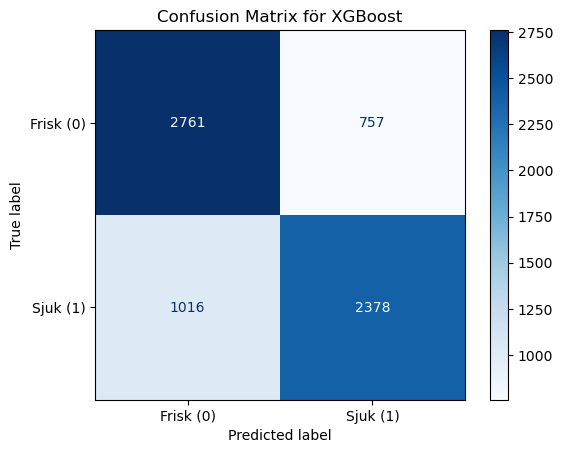

In [25]:
evaluate_xgboost_classifier(df)

# Rapporten
### Problemställning
Att förebygga hjärt- och hjärnsjukdomar är en viktig del av sjukvården. Syftet med denna studie är att analysera patientdata för att identifiera mönster som kan bidra till tidig upptäckt av sjukdomar. Maskininlärningsmetoder används för att skapa en modell som klassificerar patienter baserat på deras medicinska profiler.

### Data-analys (EDA)
Datasetet innehåller 70 000 rader med patientdata, inklusive variabler som blodtryck, kolesterolnivåer och ålder. En första analys visade att högt blodtryck, vikt och ålder har en stark koppling till sjukdomsutfall. Korrelationsmatrisen bekräftade dessa samband.

### Modell
För att klassificera patienter testades flera modeller: KNN, logistisk regression, random forest, XGBClassifier och beslutsträd. Det har valts hyperparametrar som är vanliga att justera eftersom de har stor påverkan på modellens prestanda. Efter att ha utvärderat modellernas prestanda valdes XGBClassifier, eftersom den hade högst noggrannhet (accuracy) och bäst recall på valideringsdatan. Modellen finjusterades med optimerade hyperparametrar, inklusive en regulariseringsterm på 0.1.

### Resultat
Den slutliga modellen, XGBClassifier, uppnådde en noggrannhet på 73,4 % och en recall på 69 %, vilket var det bästa resultatet av de testade modellerna. Detta visar att modellen är relativt bra på att identifiera positiva fall, även om det finns utrymme för förbättringar.

![Gämföra_modeller](result_plot.png)

### Diskussion
Trots att modellen presterade bra finns vissa begränsningar. Datasetet kan innehålla bias beroende på hur data har samlats in, vilket kan påverka hur modellen generaliserar till nya patienter. För att förbättra prestandan kan mer avancerade modeller, såsom neurala nätverk, testas. En möjlig vidareutveckling är också att inkludera fler kliniska variabler för en mer exakt riskbedömning.
